# ***Challenge Telecom X: análisis de evasión de clientes - Parte 2***

#Preparación de los datos para el modelado (tratamiento, codificación, normalización).

In [594]:
##Importar librerias
import pandas as pd
import numpy as np
import plotly.express as px

In [595]:
#Importar datos
datos = pd.read_csv('/content/TelecomX_Data_estandarizado.csv')
#Eliminar datos irrelevantes, en este caso Id clientes, cuentas_diarias (creada a partir de cargo_mensual)
datos = datos.drop(['id_cliente','cuentas_diarias'],axis=1)

In [596]:
datos

,es_hombre,es_adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,tiene_telefono,tiene_varias_lineas,tipo_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tiene_tv,tiene_peliculas,tipo_contrato,factura_online,metodo_pago,cargo_mensual,cargo_total,abandono
0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,Anual_1,1,Cheque,65.60,593.30,0
1,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Mensual,0,Cheque,59.90,542.40,0
2,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Mensual,1,Cheque_electrónico,73.90,280.85,1
3,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Mensual,1,Cheque_electrónico,98.00,1237.85,1
4,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Mensual,1,Cheque,83.90,267.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,13,1,0,DSL,1,0,0,1,0,0,Anual_1,0,Cheque,55.15,742.90,0
7039,1,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Mensual,1,Cheque_electrónico,85.10,1873.70,1
7040,1,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Mensual,1,Cheque,50.30,92.75,0
7041,1,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Anual_2,0,Cheque,67.85,4627.65,0


In [597]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   es_hombre               7043 non-null   int64  
 1   es_adulto_mayor         7043 non-null   int64  
 2   tiene_pareja            7043 non-null   int64  
 3   tiene_dependientes      7043 non-null   int64  
 4   meses_contrato          7043 non-null   int64  
 5   tiene_telefono          7043 non-null   int64  
 6   tiene_varias_lineas     7043 non-null   int64  
 7   tipo_internet           7043 non-null   object 
 8   seguridad_online        7043 non-null   int64  
 9   respaldo_online         7043 non-null   int64  
 10  proteccion_dispositivo  7043 non-null   int64  
 11  soporte_tecnico         7043 non-null   int64  
 12  tiene_tv                7043 non-null   int64  
 13  tiene_peliculas         7043 non-null   int64  
 14  tipo_contrato           7043 non-null   

In [598]:
datos.describe()

,es_hombre,es_adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,tiene_telefono,tiene_varias_lineas,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tiene_tv,tiene_peliculas,factura_online,cargo_mensual,cargo_total,abandono
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [599]:
datos.describe(include='O')

,tipo_internet,tipo_contrato,metodo_pago
count,7043,7043,7043
unique,3,3,4
top,Fiber optic,Mensual,Cheque_electrónico
freq,3096,3875,2365


In [600]:
px.histogram(datos, x = 'abandono', text_auto = True)

In [601]:
px.histogram(datos, x = 'es_hombre', text_auto = True)

In [602]:
px.box(datos, x = 'meses_contrato', color = 'abandono')

In [603]:
px.box(datos, x = 'cargo_mensual', color = 'abandono')

In [604]:
px.box(datos, x = 'cargo_total', color = 'abandono')

# Análisis de correlación y selección de variables.

In [605]:
# Importar biblioteca
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [606]:
#separación de los datos entre variables explicativas y variable objetivo
X = datos.drop('abandono', axis = 1)
y = datos['abandono']

In [607]:
#transformación de las variables categóricas
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['tipo_internet','tipo_contrato', 'metodo_pago']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [608]:
#visualizar los datos transformados
columnas = X.columns
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__tipo_internet_DSL',
       'onehotencoder__tipo_internet_Fiber optic',
       'onehotencoder__tipo_internet_No',
       'onehotencoder__tipo_contrato_Anual_1',
       'onehotencoder__tipo_contrato_Anual_2',
       'onehotencoder__tipo_contrato_Mensual',
       'onehotencoder__metodo_pago_Cheque',
       'onehotencoder__metodo_pago_Cheque_electrónico',
       'onehotencoder__metodo_pago_Tarjeta',
       'onehotencoder__metodo_pago_Transferencia', 'remainder__es_hombre',
       'remainder__es_adulto_mayor', 'remainder__tiene_pareja',
       'remainder__tiene_dependientes', 'remainder__meses_contrato',
       'remainder__tiene_telefono', 'remainder__tiene_varias_lineas',
       'remainder__seguridad_online', 'remainder__respaldo_online',
       'remainder__proteccion_dispositivo', 'remainder__soporte_tecnico',
       'remainder__tiene_tv', 'remainder__tiene_peliculas',
       'remainder__factura_online', 'remainder__cargo_mensual',
       'remainder__cargo_total'], 

In [609]:
#visualizar DataFrame
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

,onehotencoder__tipo_internet_DSL,onehotencoder__tipo_internet_Fiber optic,onehotencoder__tipo_internet_No,onehotencoder__tipo_contrato_Anual_1,onehotencoder__tipo_contrato_Anual_2,onehotencoder__tipo_contrato_Mensual,onehotencoder__metodo_pago_Cheque,onehotencoder__metodo_pago_Cheque_electrónico,onehotencoder__metodo_pago_Tarjeta,onehotencoder__metodo_pago_Transferencia,...,remainder__tiene_varias_lineas,remainder__seguridad_online,remainder__respaldo_online,remainder__proteccion_dispositivo,remainder__soporte_tecnico,remainder__tiene_tv,remainder__tiene_peliculas,remainder__factura_online,remainder__cargo_mensual,remainder__cargo_total
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90
7039,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70
7040,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75
7041,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65


In [610]:
#transformar variable objetivo

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Modelos de clasificación

In [611]:
#Importar biblioteca para modelos
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [612]:
#separar el conjunto de datos entrenamiento y prueba
#x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,  random_state = 5)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15,stratify=y,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=42)

##Dummy

In [613]:
#ajustar modelo en datos de entrenamiento iniciar modelo y evaluar desempeño
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
print(f'Resultado de pruebas: {dummy.score(X_test, y_test)}')
print(f'Precisión de entrenamiento: {dummy.score(X_train, y_train)}')
print(f'Precisión de validación: {dummy.score(X_val, y_val)}')

Resultado de pruebas: 0.7350993377483444
Precisión de entrenamiento: 0.7344620182668746
Precisión de validación: 0.7348029392117569


In [614]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
baseline = DummyRegressor()
baseline.fit(X_train,y_train)

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae= mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 0.4413, 'MAE': 0.3898, 'R2': -0.0}

In [615]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

cv = KFold(n_splits=5,shuffle=True, random_state=42)
cv_results = cross_validate(dummy, X_train, y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([0.00099277, 0.00080347, 0.00067139, 0.00075912, 0.00096416]),
 'score_time': array([0.00193977, 0.00172949, 0.00174189, 0.00169063, 0.00309944]),
 'test_RMSE': array([-0.49720824, -0.52763286, -0.53704628, -0.49044319, -0.52262096]),
 'test_MAE': array([-0.24721604, -0.27839644, -0.28841871, -0.24053452, -0.27313266]),
 'test_R2': array([-0.32840237, -0.38580247, -0.40532081, -0.31671554, -0.37576687])}

##Árbol de Decisión

In [616]:
#ajustar modelo en datos de entrenamiento iniciar modelo y evaluar desempeño
arbol = DecisionTreeClassifier(max_depth = 4, random_state =42)
arbol.fit(X_train, y_train)

print(f'Resultado de pruebas: {arbol.score(X_test, y_test)}')
print(f'Precisión de entrenamiento: {arbol.score(X_train, y_train)}')
print(f'Precisión de validación: {arbol.score(X_val, y_val)}')

Resultado de pruebas: 0.7928098391674551
Precisión de entrenamiento: 0.7972822454889731
Precisión de validación: 0.7808951235804943


In [617]:
ypred = arbol.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 0.4552, 'MAE': 0.2072, 'R2': -0.064}

In [618]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

cv = KFold(n_splits=5,shuffle=True, random_state=42)
cv_results = cross_validate(arbol, X_train, y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([0.00985456, 0.01036382, 0.0086937 , 0.01183105, 0.0096097 ]),
 'score_time': array([0.00429296, 0.00226569, 0.00228405, 0.00232339, 0.0024209 ]),
 'test_RMSE': array([-0.45388695, -0.46599273, -0.47895581, -0.47779188, -0.4662524 ]),
 'test_MAE': array([-0.20601336, -0.21714922, -0.22939866, -0.22828508, -0.2173913 ]),
 'test_R2': array([-0.10700197, -0.08092593, -0.11774551, -0.24966058, -0.09499812])}

##Bosque Aleatorio

In [619]:
random = RandomForestClassifier(max_depth = 4, random_state=42)
random.fit(X_train, y_train)

print(f'Resultado de pruebas: {random.score(X_test, y_test)}')
print(f'Precisión de entrenamiento: {random.score(X_train, y_train)}')
print(f'Precisión de validación: {random.score(X_val, y_val)}')

Resultado de pruebas: 0.7928098391674551
Precisión de entrenamiento: 0.7968367119625752
Precisión de validación: 0.7842351369405478


In [620]:
ypred = random.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 0.4552, 'MAE': 0.2072, 'R2': -0.064}

In [621]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

cv = KFold(n_splits=5,shuffle=True, random_state=42)
cv_results = cross_validate(random, X_train, y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([0.26472592, 0.25699735, 0.25754213, 0.28259444, 0.24537683]),
 'score_time': array([0.01262832, 0.01406264, 0.01241112, 0.01242018, 0.01259518]),
 'test_RMSE': array([-0.42735005, -0.46718605, -0.46837634, -0.44396473, -0.46505535]),
 'test_MAE': array([-0.18262806, -0.21826281, -0.21937639, -0.19710468, -0.21627648]),
 'test_R2': array([ 0.01865771, -0.08646914, -0.06891197, -0.07897524, -0.08938275])}

##Resumen modelos

In [622]:
print(f'La exactitud del modelo dummy aleatorio es: {dummy.score(X,y)}')
print(f'La exactitud del modelo arbol aleatorio es: {arbol.score(X,y)}')
print(f'La exactitud del modelo aleatorio aleatorio es: {random.score(X,y)}')

La exactitud del modelo dummy aleatorio es: 0.7345472769796191
La exactitud del modelo arbol aleatorio es: 0.7931840962245239
La exactitud del modelo aleatorio aleatorio es: 0.7936852656197795


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



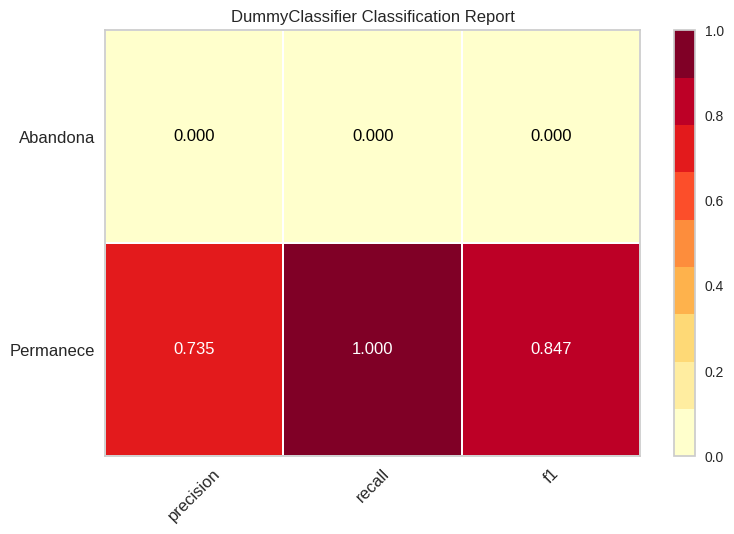

<Axes: title={'center': 'DummyClassifier Classification Report'}>

In [623]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(dummy, classes=['Permanece', 'Abandona']);
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

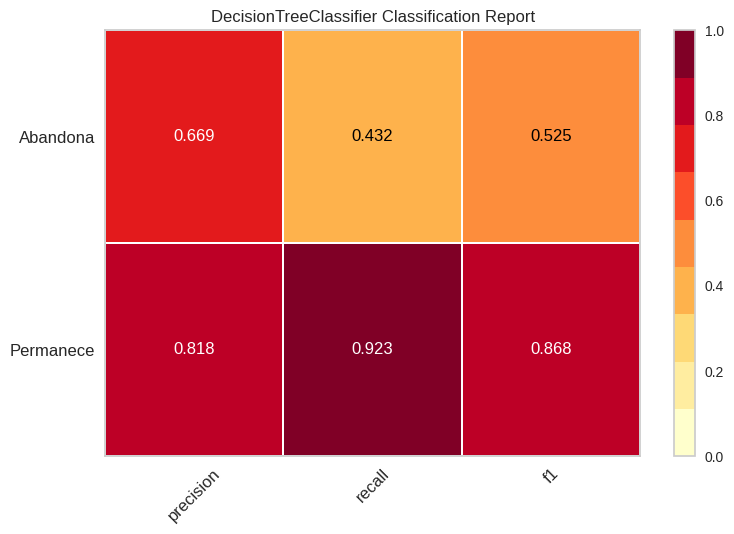

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [624]:
visualizer = ClassificationReport(arbol, classes=['Permanece', 'Abandona']);
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

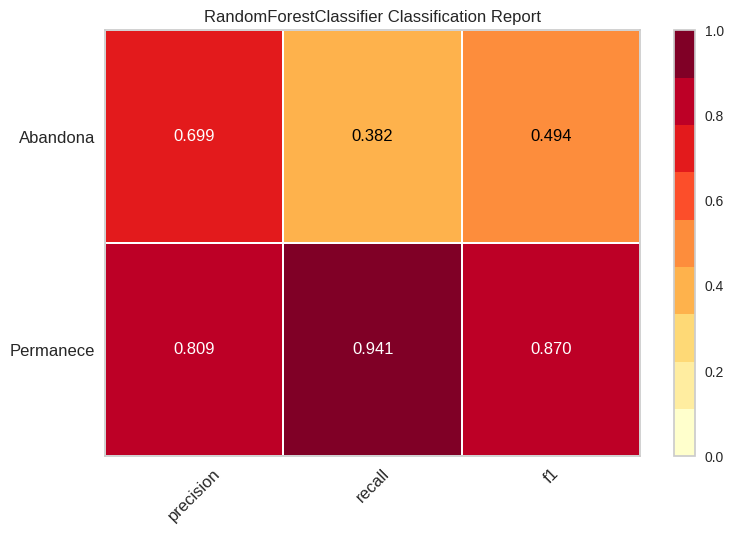

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [625]:
visualizer = ClassificationReport(random, classes=['Permanece', 'Abandona']);
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Evaluación del rendimiento de los modelos con métricas.

In [716]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

import pickle

##***Dummy***

###Matriz de confusión

In [640]:
y_previsto = dummy.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[1100    0]
 [ 397    0]]


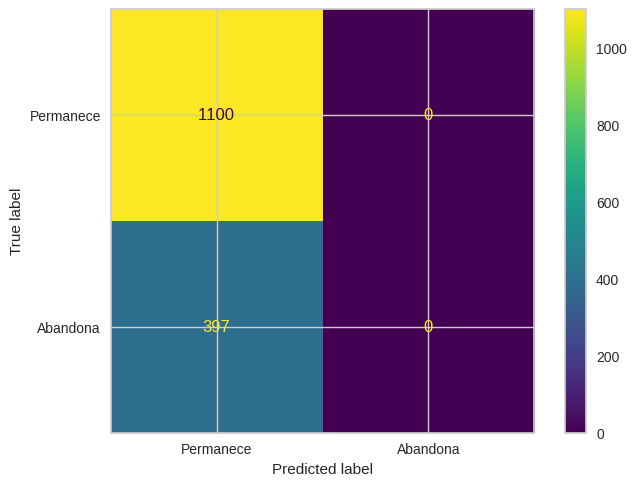

In [641]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Permanece','Abandona'])
visualizacion.plot();

In [642]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

La precisión del modelo es: 0.0
La sensibilidad (Recall) del modelo es: 0.0
La exactitud (accuracy) del modelo es: 0.7348029392117569
El F1-score del modelo es: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



###Curva ROC

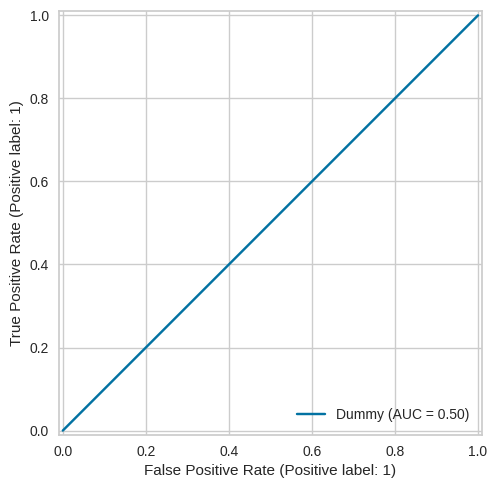

In [643]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Dummy');

In [644]:
from sklearn.metrics import roc_auc_score
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto)}')

El área bajo la curva ROC es: 0.5


###Curva de precisión x sensibilidad

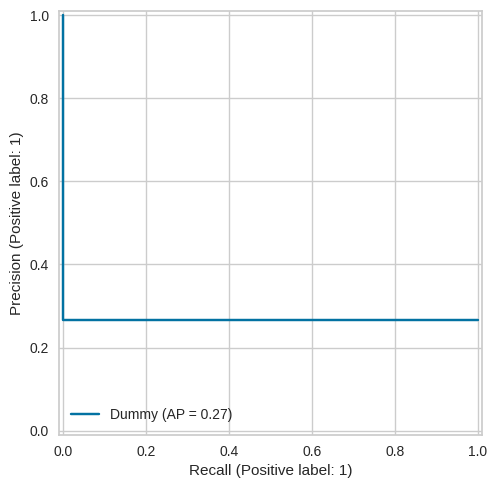

In [645]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto, name='Dummy');

In [646]:
from sklearn.metrics import average_precision_score

In [647]:
print(f'El score promedio de precision vs recall es: {average_precision_score(y_val,y_previsto)}')

El score promedio de precision vs recall es: 0.2651970607882432


###Informe de métricas

In [648]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1100
           1       0.00      0.00      0.00       397

    accuracy                           0.73      1497
   macro avg       0.37      0.50      0.42      1497
weighted avg       0.54      0.73      0.62      1497



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



###Validación cruzada

In [649]:
modelo = DummyClassifier()
kf = KFold()
cv_resultados =cross_validate(modelo,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.00088882, 0.00076175, 0.0010643 , 0.00094628, 0.00109482]),
 'score_time': array([0.00065875, 0.00068092, 0.00090814, 0.0013566 , 0.00088692]),
 'test_score': array([0.75792988, 0.73433584, 0.73099415, 0.71345029, 0.73600668])}

In [650]:
cv_resultados['test_score']

array([0.75792988, 0.73433584, 0.73099415, 0.71345029, 0.73600668])

In [651]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío típico es de: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es de: 0.7345433701114221
El desvío típico es de: 0.014188926826924407
El intervalo de confianza es: [0.7061655164575733,0.7629212237652709]


####Validación cruzada con sensibilidad

In [652]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

In [653]:
modelo = DummyClassifier()
kf = KFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.00140047, 0.00084066, 0.00098729, 0.00078106, 0.00070286]),
 'score_time': array([0.00261545, 0.00216842, 0.00212312, 0.00209165, 0.00210118]),
 'test_score': array([0., 0., 0., 0., 0.])}

In [654]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.0,0.0]'

####Estratificando los datos

In [655]:
datos['abandono'].value_counts(normalize=True)

,proportion
abandono,
0,0.73463
1,0.26537


In [656]:
modelo = DummyClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(modelo,X,y,cv=skf,scoring='recall')

intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.0,0.0]'

###Balanceo de los datos

####Oversampling

In [657]:
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)

In [658]:
y_balanceada = pd.Series(y_balanceada)
y_balanceada.value_counts(normalize=True)

,proportion
0,0.5
1,0.5


In [659]:
modelo = DummyClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [-0.5797958971132713,1]'

####Pipeline para validación

In [660]:
modelo = DummyClassifier()
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.0,0.0]'

####Undersampling

In [661]:
modelo = DummyClassifier()
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')

intervalo_confianza(cv_resultados)


'El intervalo de confianza es: [0.0,0.0]'

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       777
           1       0.00      0.00      0.00       280

    accuracy                           0.74      1057
   macro avg       0.37      0.50      0.42      1057
weighted avg       0.54      0.74      0.62      1057



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



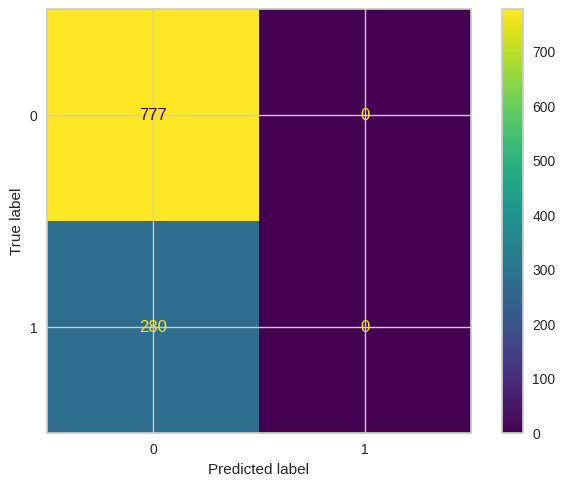

In [662]:
undersample = NearMiss(version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

modelo = DummyClassifier()
modelo.fit(x_balanceada,y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

##***Arbol de Decision***

###Matriz de confusión

In [663]:
y_previsto = arbol.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[1012   88]
 [ 240  157]]


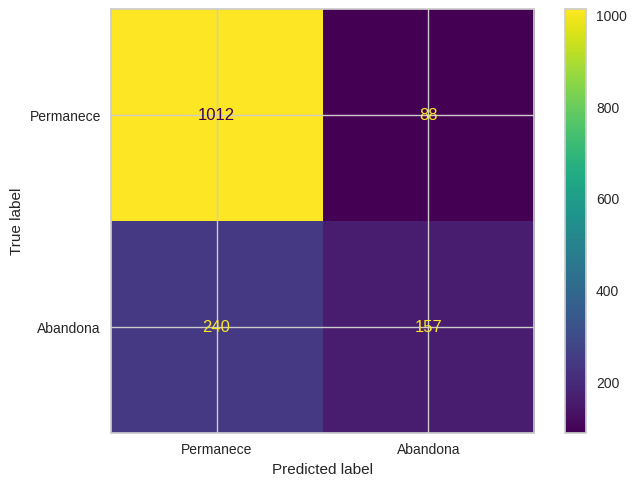

In [664]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Permanece','Abandona'])
visualizacion.plot();

In [665]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

La precisión del modelo es: 0.6408163265306123
La sensibilidad (Recall) del modelo es: 0.3954659949622166
La exactitud (accuracy) del modelo es: 0.7808951235804943
El F1-score del modelo es: 0.48909657320872274


###Curva ROC

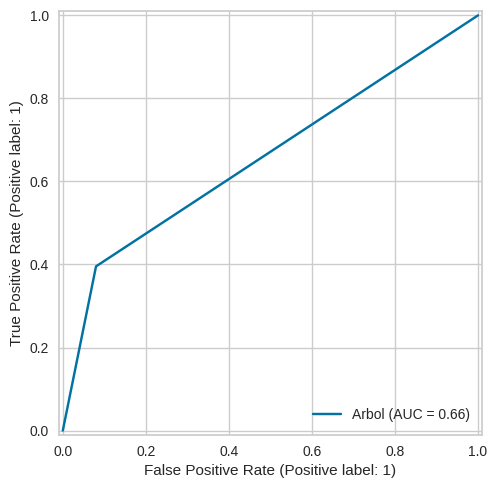

In [666]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Arbol');

In [667]:
from sklearn.metrics import roc_auc_score
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto)}')

El área bajo la curva ROC es: 0.6577329974811083


###Curva de precisión x sensibilidad

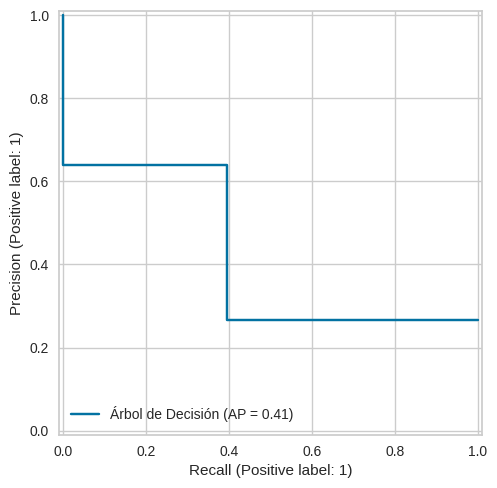

In [668]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto, name='Árbol de Decisión');

In [669]:
from sklearn.metrics import average_precision_score

In [670]:
print(f'El score promedio de precision vs recall es: {average_precision_score(y_val,y_previsto)}')

El score promedio de precision vs recall es: 0.41374170744202643


###Informe de métricas

In [671]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1100
           1       0.64      0.40      0.49       397

    accuracy                           0.78      1497
   macro avg       0.72      0.66      0.67      1497
weighted avg       0.76      0.78      0.76      1497



###Validación cruzada

In [672]:
modelo = DecisionTreeClassifier()
kf = KFold()
cv_resultados =cross_validate(modelo,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.03291845, 0.02702522, 0.02752137, 0.04061389, 0.02773619]),
 'score_time': array([0.00125337, 0.00140214, 0.00177765, 0.00126529, 0.00150514]),
 'test_score': array([0.73038397, 0.72431078, 0.72263993, 0.73684211, 0.74519632])}

In [673]:
cv_resultados['test_score']

array([0.73038397, 0.72431078, 0.72263993, 0.73684211, 0.74519632])

In [674]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío típico es de: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es de: 0.7318746225608541
El desvío típico es de: 0.008328948330580822
El intervalo de confianza es: [0.7152167258996924,0.7485325192220158]


####Validación cruzada con sensibilidad

In [675]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.02391219, 0.02331471, 0.02247477, 0.02336454, 0.0223105 ]),
 'score_time': array([0.00308228, 0.00286078, 0.00351906, 0.00289798, 0.00281143]),
 'test_score': array([0.53943218, 0.45045045, 0.54983923, 0.5224359 , 0.53481013])}

In [676]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.4482398629966482,0.590547288771591]'

####Estratificando los datos

In [677]:
datos['abandono'].value_counts(normalize=True)

,proportion
abandono,
0,0.73463
1,0.26537


In [678]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(modelo,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.4530580247152632,0.5325142626485843]'

###Balanceo de los datos

####Oversampling

In [679]:
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)
y_balanceada = pd.Series(y_balanceada)
y_balanceada.value_counts(normalize=True)

,proportion
0,0.5
1,0.5


In [680]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.798749961681312,0.863297819888654]'

####Pipeline para validación

In [681]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')

intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.5229500436335925,0.6527101353240092]'

####Undersampling

In [682]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')

intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.6286446112716589,0.6866620173020369]'

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       777
           1       0.42      0.59      0.49       280

    accuracy                           0.68      1057
   macro avg       0.62      0.65      0.63      1057
weighted avg       0.72      0.68      0.69      1057



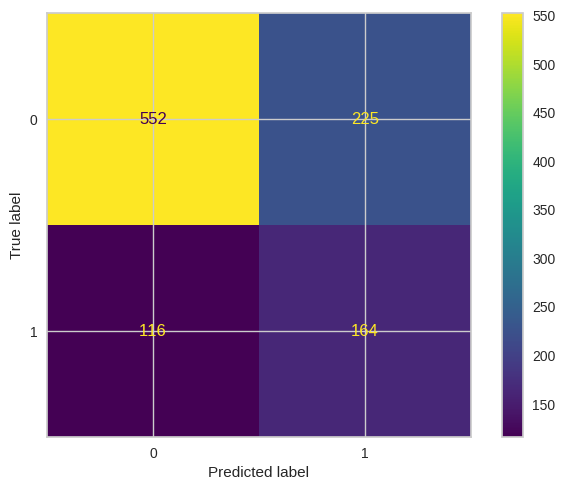

In [683]:
##Probar el modelo
undersample = NearMiss(version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanceada,y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

##Bosque Aleatorio

###Matriz de confusión

In [684]:
y_previsto = random.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
print(matriz_confusion)

[[1034   66]
 [ 257  140]]


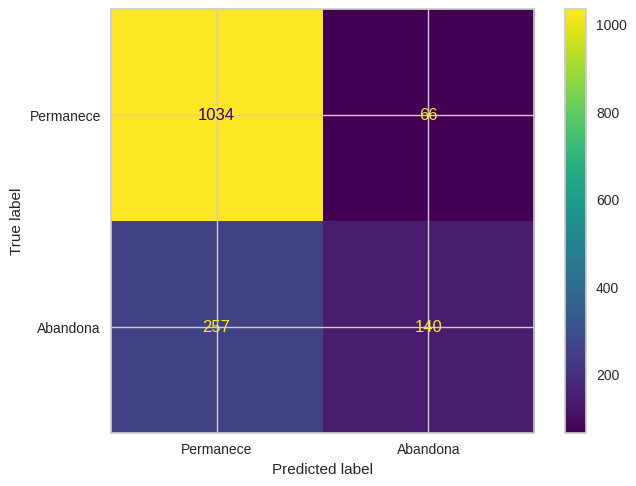

In [685]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Permanece','Abandona'])
visualizacion.plot();

In [686]:
print(f'La precisión del modelo es: {precision_score(y_val,y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val,y_previsto)}')
print(f'El F1-score del modelo es: {f1_score(y_val,y_previsto)}')

La precisión del modelo es: 0.6796116504854369
La sensibilidad (Recall) del modelo es: 0.3526448362720403
La exactitud (accuracy) del modelo es: 0.7842351369405478
El F1-score del modelo es: 0.46434494195688225


###Curva ROC

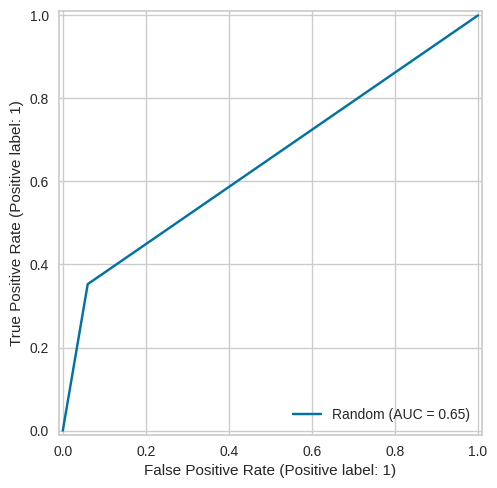

In [687]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='Random');

In [688]:
from sklearn.metrics import roc_auc_score
print(f'El área bajo la curva ROC es: {roc_auc_score(y_val,y_previsto)}')

El área bajo la curva ROC es: 0.6463224181360201


###Curva de precisión x sensibilidad

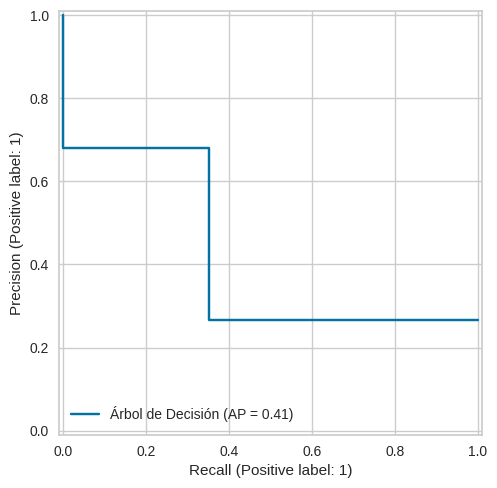

In [689]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto, name='Árbol de Decisión');

In [690]:
from sklearn.metrics import average_precision_score

In [691]:
print(f'El score promedio de precision vs recall es: {average_precision_score(y_val,y_previsto)}')

El score promedio de precision vs recall es: 0.41133822592075486


###Informe de métricas

In [692]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1100
           1       0.68      0.35      0.46       397

    accuracy                           0.78      1497
   macro avg       0.74      0.65      0.66      1497
weighted avg       0.77      0.78      0.76      1497



###Validación cruzada

In [693]:
modelo = RandomForestClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(modelo,X,y,cv=kf)
cv_resultados

{'fit_time': array([0.49598861, 0.49531889, 0.50389385, 0.51441145, 0.50930309]),
 'score_time': array([0.01995897, 0.02142072, 0.01996374, 0.02275157, 0.03208661]),
 'test_score': array([0.80300501, 0.80701754, 0.81537176, 0.8053467 , 0.78780284])}

In [694]:
cv_resultados['test_score']

array([0.80300501, 0.80701754, 0.81537176, 0.8053467 , 0.78780284])

In [695]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud es de: {promedio}')
print(f'El desvío típico es de: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud es de: 0.8037087710930079
El desvío típico es de: 0.008979421750642314
El intervalo de confianza es: [0.7857499275917232,0.8216676145942925]


####Validación cruzada con sensibilidad

In [696]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

modelo = RandomForestClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(modelo,X,y,cv=kf,scoring='recall')
cv_resultados

{'fit_time': array([0.75473356, 0.74614549, 0.79785347, 0.55048299, 0.49057603]),
 'score_time': array([0.0291431 , 0.0407331 , 0.03227806, 0.02192998, 0.0223937 ]),
 'test_score': array([0.54574132, 0.5045045 , 0.49839228, 0.54166667, 0.53797468])}

In [697]:
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.4856338214367505,0.5656779636011734]'

####Estratificando los datos

In [698]:
datos['abandono'].value_counts(normalize=True)

,proportion
abandono,
0,0.73463
1,0.26537


In [699]:
modelo = RandomForestClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(modelo,X,y,cv=skf,scoring='recall')

intervalo_confianza(cv_resultados)


'El intervalo de confianza es: [0.4570658893312518,0.5926890855710356]'

###Balanceo de los datos

####Oversampling

In [700]:
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)
y_balanceada = pd.Series(y_balanceada)
y_balanceada.value_counts(normalize=True)

,proportion
0,0.5
1,0.5


In [701]:
modelo = RandomForestClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.8591603207507122,0.8811215077734372]'

####Pipeline para validación

In [702]:
modelo = RandomForestClassifier(max_depth=10)
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')

intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.5841396386819012,0.684641981459757]'

####Undersampling

In [703]:
modelo = RandomForestClassifier(max_depth=10)
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')

intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.6644378025946241,0.7175870768768359]'

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       777
           1       0.52      0.67      0.59       280

    accuracy                           0.75      1057
   macro avg       0.69      0.72      0.70      1057
weighted avg       0.78      0.75      0.76      1057



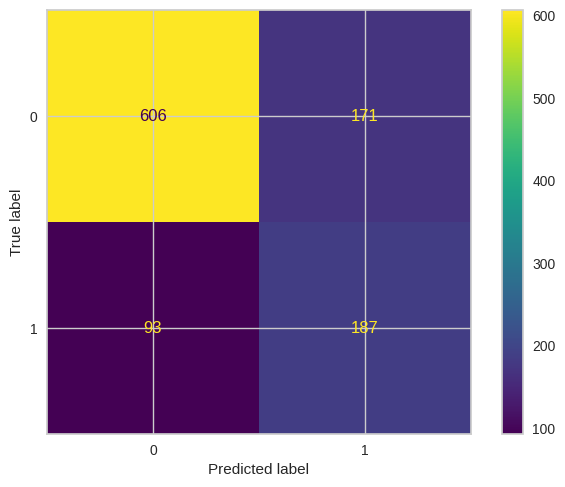

In [704]:
## Probar el modelo
undersample = NearMiss(version = 3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)


modelo = RandomForestClassifier(max_depth=10)
modelo.fit(x_balanceada,y_balanceada)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);


#Interpretación de los resultados, incluyendo la importancia de las variables.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [705]:
importances = random.feature_importances_
feature_importances = pd.DataFrame({'Features':one_hot.get_feature_names_out(columnas),'Importances':(importances*100).round(2)}).sort_values('Importances',ascending=False)
feature_importances

,Features,Importances
5,onehotencoder__tipo_contrato_Mensual,29.08
14,remainder__meses_contrato,15.95
1,onehotencoder__tipo_internet_Fiber optic,11.29
25,remainder__cargo_total,9.60
7,onehotencoder__metodo_pago_Cheque_electrónico,7.35
4,onehotencoder__tipo_contrato_Anual_2,7.35
24,remainder__cargo_mensual,4.49
2,onehotencoder__tipo_internet_No,3.41
3,onehotencoder__tipo_contrato_Anual_1,2.17
23,remainder__factura_online,1.69


In [706]:
resultados = pd.DataFrame(index=['Accuracy'])
model_features = RandomForestClassifier(max_depth=5,random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,len(feature_importances)+1,5)]

X_train_df = pd.DataFrame(X_train, columns=one_hot.get_feature_names_out(columnas))
X_test_df = pd.DataFrame(X_test, columns=one_hot.get_feature_names_out(columnas))

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train_df[selected_features]
  X_test_sel = X_test_df[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  resultados[i] = [accuracy_score(y_test, y_pred)]

resultados

,1,5,10,15,20,25
Accuracy,0.735099,0.787133,0.789026,0.793756,0.79281,0.79281


In [707]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = range(10,16)

X_train_df = pd.DataFrame(X_train, columns=one_hot.get_feature_names_out(columnas))
X_test_df = pd.DataFrame(X_test, columns=one_hot.get_feature_names_out(columnas))

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train_df[selected_features]
  X_test_sel = X_test_df[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,0.3757,0.3754,0.3754,0.3750,0.3749,0.3749
MAE,0.2774,0.2770,0.2770,0.2768,0.2771,0.2771
R2,0.2750,0.2763,0.2764,0.2777,0.2782,0.2783


In [708]:
selected_features = feature_importances['Features'].values[:13]
X_df = pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))
X_selected_features = X_df[selected_features]
X_selected_features

,onehotencoder__tipo_contrato_Mensual,remainder__meses_contrato,onehotencoder__tipo_internet_Fiber optic,remainder__cargo_total,onehotencoder__metodo_pago_Cheque_electrónico,onehotencoder__tipo_contrato_Anual_2,remainder__cargo_mensual,onehotencoder__tipo_internet_No,onehotencoder__tipo_contrato_Anual_1,remainder__factura_online,remainder__soporte_tecnico,onehotencoder__tipo_internet_DSL,remainder__seguridad_online
0,0.0,0.0,0.0,0.00,0.0,1.0,52.55,0.0,0.0,1.0,1.0,1.0,1.0
1,1.0,30.0,0.0,2000.20,1.0,0.0,67.60,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,71.0,0.0,5831.20,0.0,1.0,82.70,0.0,0.0,1.0,1.0,1.0,1.0
3,1.0,25.0,1.0,2362.10,0.0,0.0,94.70,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,24.0,1.0,2496.70,0.0,0.0,102.95,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1.0,33.0,1.0,3105.55,1.0,0.0,94.50,0.0,0.0,1.0,0.0,0.0,0.0
5982,1.0,14.0,1.0,1178.40,1.0,0.0,89.95,0.0,0.0,1.0,1.0,0.0,0.0
5983,1.0,3.0,1.0,272.20,1.0,0.0,85.80,0.0,0.0,0.0,1.0,0.0,0.0
5984,0.0,24.0,0.0,571.75,0.0,1.0,24.70,1.0,0.0,0.0,0.0,0.0,0.0


In [709]:
X_train,X_test,y_train,y_test = train_test_split(X_selected_features,y,random_state=42)

In [710]:
param_grid = {
              'max_depth':[5,10,15],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[2,4,6],
              'n_estimators':[100,150,200]
             }

In [711]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid=param_grid, scoring='r2',
                          cv=cv)

model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [712]:
model_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 150}

In [713]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

{'RMSE': 0.3729, 'MAE': 0.2765, 'R2': 0.2865}

In [714]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,0.3757,0.3754,0.3754,0.3750,0.3749,0.3749,0.3729
MAE,0.2774,0.2770,0.2770,0.2768,0.2771,0.2771,0.2765
R2,0.2750,0.2763,0.2764,0.2777,0.2782,0.2783,0.2865


In [715]:
try:
  with open('champion.pkl','wb') as file:
    pickle.dump(model_grid.best_estimator_,file)
  print('Modelo serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo: ',str(e))

Modelo serializado con éxito


# Análisis Predictivo de Abandono de Clientes en Telecomunicaciones

## 1. Interpretación de Resultados por Modelo

---

### **DummyClassifier** (modelo de referencia)
- **Exactitud:** ~73.5%, pero *recall* de clase **abandono** = 0%.
- **Matriz de confusión:** Clasifica todos los casos como “no abandono” (clase mayoritaria).
- **AUC-ROC:** 0.5 → equivalente a predicción aleatoria.

**Conclusión:**  
Sirve como *baseline*. Confirma que el dataset está desbalanceado (73% no abandona vs. 27% abandona) y que un clasificador ingenuo no capta la clase minoritaria.

---

### **DecisionTreeClassifier**
- **Exactitud:** 78% en pruebas.
- **Recall (abandono):** 39.5% → mejora frente al *baseline*, pero aún deja fuera ~60% de los abandonos reales.
- **Precisión (abandono):** 64%.
- **AUC-ROC:** 0.66 → capacidad moderada de separación.

**Variables más influyentes** (tendencia habitual en árboles):
1. **Tenure** (meses en la compañía)
2. **Método de pago**
3. **Tipo de contrato**
4. **Costo mensual**
5. **Servicios adicionales**

**Observación:**  
Puede sobreajustar si no se controla la profundidad, aunque aquí mantiene un balance razonable.

---

### **RandomForestClassifier** (modelo optimizado)
- **Exactitud:** ~78% en pruebas y **80.3%** en validación cruzada.
- **Recall (abandono):** 35.3% → ligeramente menor que el árbol simple pero más estable.
- **Precisión (abandono):** 68%.
- **AUC-ROC:** 0.65.

Ventaja:
Menos sensible a ruido que un solo árbol y más consistente en distintas muestras.

---

### **Importancia real de variables**

| Ranking | Variable                           | Importancia (%) |
|---------|------------------------------------|-----------------|
| 1       | Tipo de contrato – Mensual         | 29.08           |
| 2       | Meses de contrato (Tenure)         | 15.95           |
| 3       | Tipo de internet – Fibra óptica    | 11.29           |
| 4       | Cargo total acumulado              | 9.60            |
| 5       | Método de pago – Cheque electrónico| 7.35            |
| 6       | Tipo de contrato – Anual (2 años)  | 7.35            |
| 7       | Cargo mensual                      | 4.49            |
| 8       | Tipo de internet – No              | 3.41            |
| 9       | Tipo de contrato – Anual (1 año)   | 2.17            |
| 10      | Factura online                     | 1.69            |
| ...     | Resto de variables                 | < 1.7

-
1. **Meses de contrato** – principal predictor (clientes nuevos son más inestables).
2. **Tipo de contrato** – mensual tiene mayor riesgo.
3. **Costo mensual** – valores extremos (muy alto o muy bajo) pueden detonar abandono.
4. **Método de pago** – automático vs. manual.
5. **Uso de servicios adicionales** – menos productos contratados se asocia a mayor riesgo.

# Conclusión estratégica señalando los principales factores que influyen en la cancelación.

Los modelos confirman que **el tipo de contrato** y **el tiempo en la compañía** son los factores más determinantes del abandono.  
Además, surgen hallazgos clave en torno a la **tecnología contratada**, **costos** y **método de pago** como palancas para reducir la fuga.

---

## Estrategias Recomendadas

### 1. Migración de clientes de contrato mensual a anual
Ofrecer **descuentos**, **beneficios exclusivos** o **programas de fidelización** para incentivar permanencias más largas.

### 2. Programa de retención temprana (*primeros 3 meses*)
Implementar **seguimiento proactivo**, **contacto personalizado** y **resolución ágil de incidencias** para clientes nuevos.

### 3. Plan especial para clientes de fibra óptica
Refuerzo en la **calidad de servicio**, **soporte prioritario** y **encuestas tempranas** para detectar insatisfacciones.

### 4. Optimización de precios y cargos acumulados
Detectar clientes con **facturación elevada** y ofrecer **planes ajustados** antes de la cancelación.

### 5. Fomento de pagos automáticos
Incentivar métodos como **tarjeta** o **débito automático** para reducir fricciones en el pago.